In [1]:
#from numpy import *

In [1]:
#graph library
import numpy as np
import matplotlib.pyplot as plt

# Dataset 

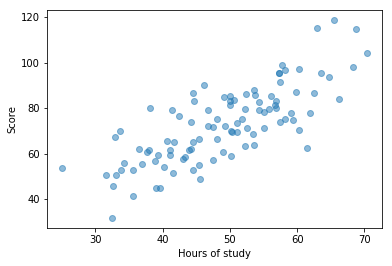

In [2]:
points = np.genfromtxt("data.csv", delimiter=",")
x = points[ : , 0] # get x hours of study
y = points[ : , 1] # get y exam score

#plt.xkcd()
#plt.figure(figsize=(6,6))
plt.xlabel('Hours of study')
plt.ylabel('Score')
plt.scatter(x, y, alpha=0.5)
plt.show()


# Linear Regression: gradient descent trial1

In [12]:
from myGradientDescent import *

learning_rate = 0.00001
initial_b = 0 # initial y-intercept guess
initial_m = 0 # initial slope guess
num_iterations = 1000
print("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points( initial_b, initial_m, points)))
print("Running...")
[b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
print("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))


Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 1000 iterations b = 0.0350749501965312, m = 1.4788027179317091, error = 112.64705665514039


## After Gradient Descent

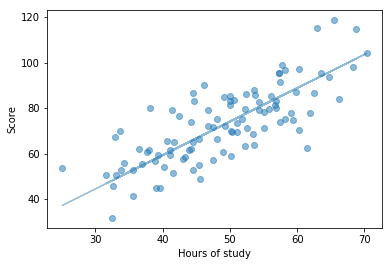

In [4]:
def f(b, m, x):
    return m * x + b

#plt.figure(figsize=(6,6))
plt.xlabel('Hours of study')
plt.ylabel('Score')
plt.scatter(x, y, alpha=0.5)
plt.plot(x, f(b,m,x), alpha=0.5)
plt.show()

# Linear Regression: gradient descent -> Andrew Ng

In [10]:
from myDescent import *

learning_rate = 0.00001
initial_t0 = 0 # initial y-intercept guess
initial_t1 = 0 # initial slope guess
num_iterations = 1000

print("Starting gradient descent at b = {0}(theta0), m = {1}(theta1), error = {2}"\
      .format(initial_t0, initial_t1, cost_SSE( points, initial_t0, initial_t1)))

[b, m, iter] = gradient_descent(points, initial_t0, initial_t1, learning_rate, 100000, 0.001 )
print("After {0} iterations, b = {1}(theta0), m = {2}(theta1), error = {3}"\
      .format(iter, b, m, cost_SSE( points, b, m)))

Starting gradient descent at b = 0(theta0), m = 0(theta1), error = 556510.7834483212
Converged, iterations:  343 !!!
After 344 iterations, b = 0.03009636477130381(theta0), m = 1.4786493382106343(theta1), error = 11265.020261495949


### Comparing Cost Function Formulas
##### SumSquared Error  VS SSE / (2*m)

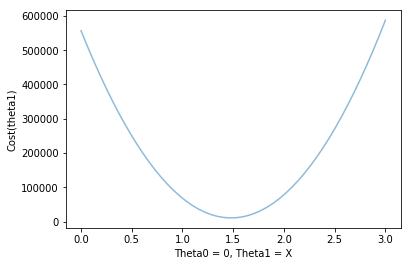

In [28]:
def cost(t0, t1):
    J = sum([(0 + t1* points[i, 0] - points[i, 1])**2 for i in range(0 , len(points))])
    return J

x = np.linspace(0, 3.0)
plt.xlabel('Theta0 = 0, Theta1 = X')
plt.ylabel('Cost(theta1)')
plt.plot(x, cost(0, x), alpha=0.5)
plt.show()

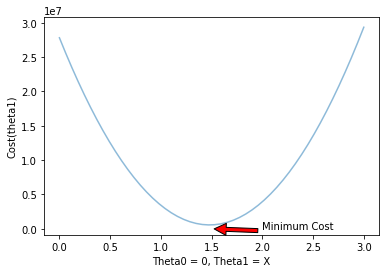

In [70]:
def cost(t0, t1):
    J = sum([(t0 + t1* points[i, 0] - points[i, 1])**2 for i in range(0 , len(points))])
    return 1.0 / 2*float(len(points)) * J

x = np.linspace(0, 3.0)

fig = plt.figure()
ax = fig.add_subplot(111)

ax.annotate('Minimum Cost', xy=(1.5, 0), xytext=(2, 2), arrowprops=dict(facecolor='red', shrink=0.05))

plt.xlabel('Theta0 = 0, Theta1 = X')
plt.ylabel('Cost(theta1)')
plt.plot(x, cost(0, x), alpha=0.5)
plt.show()

## After Gradient Descent

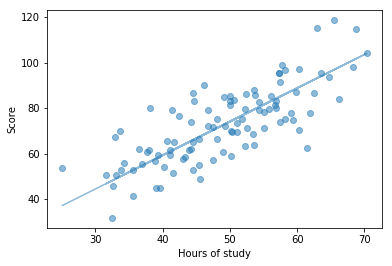

In [12]:
def f(b, m, x):
    return m * x + b

#plt.figure(figsize=(6,6))
plt.xlabel('Hours of study')
plt.ylabel('Score')
plt.scatter(x, y, alpha=0.5)
plt.plot(x, f(b,m,x), alpha=0.5)
plt.show()